# Estimating the value of $\pi$ using a Monte Carlo technique 

The program picks random points in the area $[-1,1] \times [-1,1]$, and determines which fraction of these are within the unit circle. This in turn gives a measure of $\pi$ with associated statistical uncertainty. Performing such "experiments" many times not only gives the value of $\pi$, but also a feel for the use of Monte Carlo, and experience in calculating average, standard deviation, and the error on these.
The first part of the program is mostly for illustration, while the exercise is really question 4 on using this in higher dimension problems: Calculate the (fairly simple) rational fractions in front of the formulae for the hypervolume of N-dimensional unit spheres $\frac{i}{j} \pi^m r^n$.

For more information see P. R. Bevington: page 75-78

***

### Authors: 
- Troels C. Petersen (Niels Bohr Institute)

### Date:    
- 28-12-2024 (latest update)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit, cost
from scipy import stats

and define the parameters of the program:

In [3]:
save_plots = False         # Determining if plots are saved or not
r = np.random
r.seed(42)

# Set parameters:
N_experiments = 100      # Number of "experiments" determining pi
N_points      = 2000       # Number of points per experiment in determining pi

pi_true = np.pi

## Loop over process:

In [4]:
pi_dist = np.zeros(N_experiments)

pi_err_dist = np.zeros(N_experiments)

for iexp in range(N_experiments):

    # Fill random numbers into square, and see how many are inside unit circle:
    hit_dist_x = r.uniform(-1, 1, N_points)
    hit_dist_y = r.uniform(-1, 1, N_points)
    Nhit = np.sum(hit_dist_x**2 + hit_dist_y**2 < 1)
    
    # Calculate the fraction of points within the circle and its error:
    f  = Nhit / N_points
    sf = np.sqrt(f*(1-f)/N_points)       # Remind yourself the uncertainty on a fraction n/N!!!

    # From this we can get pi and its error, and save it:
    pi_estm  = 4.0 * f
    pi_error = 4.0 * sf
    pi_dist[iexp] = pi_estm
    pi_err_dist[iexp] = pi_error


    # Print first couple of pi measurements:
    if (iexp < 5) :
        print(f"{iexp:2d}. pi estimate:   {pi_estm:7.4f} +- {pi_error:6.4f}")

 0. pi estimate:    3.1400 +- 0.0367
 1. pi estimate:    3.1680 +- 0.0363
 2. pi estimate:    3.1460 +- 0.0367
 3. pi estimate:    3.1040 +- 0.0373
 4. pi estimate:    3.1400 +- 0.0367


In [5]:
if (N_experiments > 1):
    pi_mean = pi_dist.mean()
    pi_std = pi_dist.std(ddof=1)
    unc_pi_mean = pi_std / np.sqrt(N_experiments)
    print(f"The {N_experiments:d} experiments yield: pi = {pi_mean:7.5f} +- {unc_pi_mean:7.5f}     (std = {pi_std:5.3f})")
    print(f"and the agreement with the true value of pi is: {(pi_mean - pi_true) / unc_pi_mean:6.2f} sigma")
else :
    print("Since only one experiment was done, no Mean and Std can be calculated.")

The 100 experiments yield: pi = 3.14332 +- 0.00370     (std = 0.037)
and the agreement with the true value of pi is:   0.47 sigma


## Plot "experimental" process:

Distribution of points from one experiment:

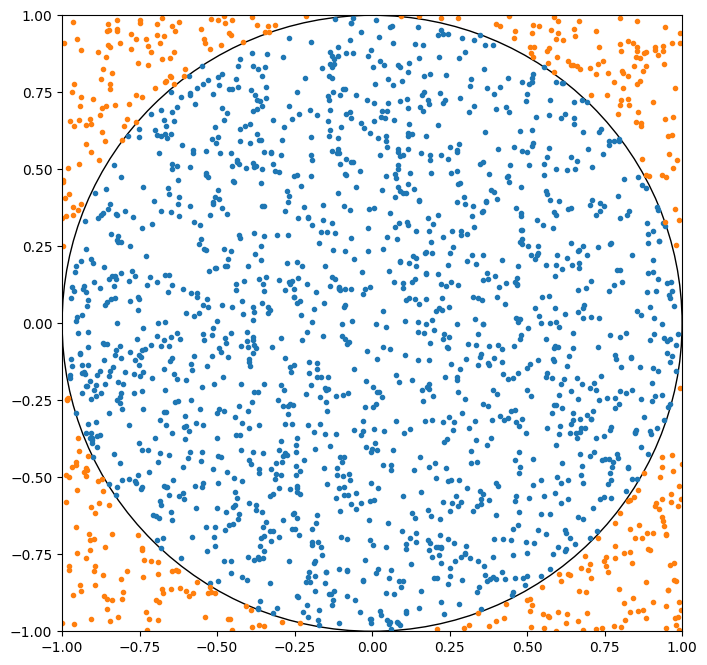

In [6]:
fig1, ax1 = plt.subplots(figsize=(8, 8))    

# Make mask of points inside vs outside the circle:
mask_inside = hit_dist_x**2 + hit_dist_y**2 < 1
mask_outside = ~mask_inside

# Make scatter plot of points:
ax1.plot(hit_dist_x[mask_inside], hit_dist_y[mask_inside], '.')
ax1.plot(hit_dist_x[mask_outside], hit_dist_y[mask_outside], '.')
ax1.set(xlim=(-1, 1), ylim=(-1,1))

# Add circle to plot:
ax1.add_artist(plt.Circle((0, 0), 1, color='k', fill=False))

if save_plots: 
    fig1.savefig("HitDist.pdf")

/var/folders/bp/h0lnb5j91bn1mykh3m6j0dx00000gn/T/ipykernel_7189/427870173.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


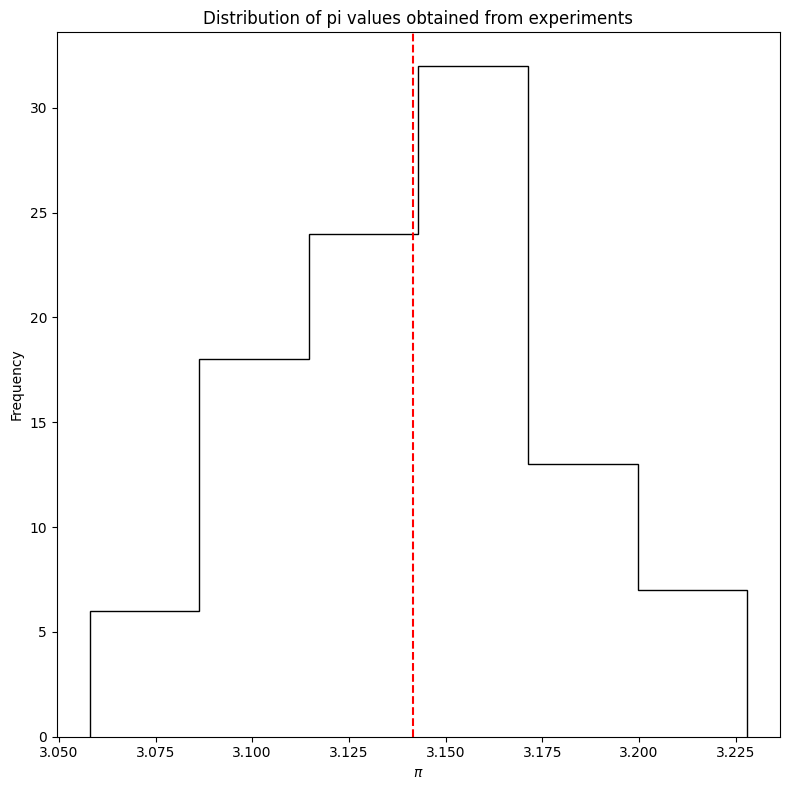

In [7]:
#Plotting the distribution of pi values obtained from the experiments

fig2, ax2 = plt.subplots(figsize=(8, 8))
ax2.hist(pi_dist, bins=6, histtype='step', color='k')
ax2.axvline(pi_true, color='r', linestyle='--')
ax2.set(xlabel= r'$\pi$', ylabel='Frequency', title='Distribution of pi values obtained from experiments')
fig2.tight_layout()
fig2.show()


***

First acquaint yourself with the program, and make sure that you understand what the parameters `N_experiment` and `N_points` refer to! Also, before running the program,
calculate what precision you expect on pi in each experiment, when using the number of points chosen in the program (i.e. 1000 points).

Then, run the program, and then take a look at the result... which requires that you fill in the calculations yourself!

# Initial simple questions:

0. Plot the distribution of $\pi$ values obtained.

1. Try to run 100 experiments with 2000 points in each. What is the expected approximate uncertainty on $\pi$ in each experiment? Does the result agree with what you calculated before running the program? What is the uncertainty on the AVERAGE of all 100 experiments? 

2. How do you expect the values of $\pi$ to distribute themselves? And is this the case here?

I expected a Gaussian distribution. It is somehow the case, it looks gaussian at least.

3. Does it make any difference on the precision of the final $\pi$ value, whether you make many experiments with few points, or one experiment with many points, as long as the product of `N_experiment` $\times$ `N_points` remains constant?

first: The 100 experiments yield: pi = 3.14570 +- 0.00362 
and the agreement with the true value of pi is:   1.13 sigma

next: The 10 experiments yield: pi = 3.14222 +- 0.00346     (std = 0.011)
and the agreement with the true value of pi is:   0.18 sigma

last: The 2 experiments yield: pi = 3.14370 +- 0.00042     (std = 0.001)
and the agreement with the true value of pi is:   5.02 sigma

So, the precision improves with fewer experiments, less points. The accuracy, however, does not follow this same pattern. And in the histogram of values, it is important to remember binning.

# The real exercise question:

4. Now try to use this method in three dimensions to estimate the constant in front of the $r^3$ expression for the volume. Do you get $\frac{4}{3} \pi$?
    Increase the dimensionality (say up to 10), and see if you can figure out the constants needed to calculate the hyper-volumes!

HINT: I'll reveal that for `N_dim` of 4 and 5, the constant contains $\pi^2$ and some simple rational fraction, while for `N_dim` 6 and 7, it contains $\pi^3$ and a rational fraction (and $\pi^4$ for 'N_dim' 8 and 9).

In [8]:
#doing the same simulation for higher dimentionality




In [9]:
#calculating the expected precision
frac = (np.pi)/4
N_points = 1000
sig_pi = np.sqrt(np.abs(frac*(1-frac)/N_points))

print(sig_pi)


0.012982599444231628


In [10]:
N_experiments = 100
N_dim         = 3

In [15]:
frac_dist = np.zeros(N_experiments)

frac_err_dist = np.zeros(N_experiments)

for iexp in range(N_experiments):

    # Fill random numbers into square, and see how many are inside unit circle:
    hit_dist = r.uniform(-1, 1, (200, 200, 200))
    N_points = 200**3
    Nhit = np.sum(hit_dist[0]**2 + hit_dist[1]**2 + hit_dist[2]**2 < 1)
    
    # Calculate the fraction of points within the circle and its error:
    f  = Nhit / N_points
    sf = np.sqrt(f*(1-f)/N_points)       # Remind yourself the uncertainty on a fraction n/N!!!

    # From this we can get pi and its error, and save it:
    frac_estm  = 4.0 * f
    frac_error = 4.0 * sf
    frac_dist[iexp] = frac_estm
    frac_err_dist[iexp] = frac_error


    # Print first couple of pi measurements:
    if (iexp < 5) :
        print(f"{iexp:2d}. pi estimate:   {pi_estm:7.4f} +- {pi_error:6.4f}")

 0. pi estimate:    3.1660 +- 0.0363
 1. pi estimate:    3.1660 +- 0.0363
 2. pi estimate:    3.1660 +- 0.0363
 3. pi estimate:    3.1660 +- 0.0363
 4. pi estimate:    3.1660 +- 0.0363


In [ ]:
if (N_experiments > 1):
    pi_mean = pi_dist.mean()
    pi_std = pi_dist.std(ddof=1)
    unc_pi_mean = pi_std / np.sqrt(N_experiments)
    print(f"The {N_experiments:d} experiments yield: pi = {pi_mean:7.5f} +- {unc_pi_mean:7.5f}     (std = {pi_std:5.3f})")
    print(f"and the agreement with the true value of pi is: {(pi_mean - pi_true) / unc_pi_mean:6.2f} sigma")
else :
    print("Since only one experiment was done, no Mean and Std can be calculated.")

In [ ]:
fig1, ax1 = plt.subplots(figsize=(8, 8))    

# Make mask of points inside vs outside the circle:
mask_inside = hit_dist_x**2 + hit_dist_y**2 < 1
mask_outside = ~mask_inside

# Make scatter plot of points:
ax1.plot(hit_dist_x[mask_inside], hit_dist_y[mask_inside], '.')
ax1.plot(hit_dist_x[mask_outside], hit_dist_y[mask_outside], '.')
ax1.set(xlim=(-1, 1), ylim=(-1,1))

# Add circle to plot:
ax1.add_artist(plt.Circle((0, 0), 1, color='k', fill=False))

if save_plots: 
    fig1.savefig("HitDist.pdf")

# Learning points:

This is an exercise in using simulation for numerical estimates, that are otherwise rather complicated. Especially in high dimensionality, it can be hard to produce good solutions, while simulation (such as this exercise) gives an easier alternative.

From the exercise you should:
1. Get experience with a simulation solution example.
2. Train estimation of uncertainties on multiple estimates (here of pi).
3. Exercise hypothesis testing, comparing simulated estimates to multiple hypothesis (rational fractions).
4. Improve your coding skills regarding how you search for suitable rational fractions.

Following this exercise, you should feel comfortable in working out a simulated answer to a problem/case.